In [183]:
import json
import matplotlib.path as mplPath
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from dbbase import session,Dist,MDist,Cell,Record

json_data = open('beijing1.json').read()
data = json.loads(json_data)

# for item in data:
#     print item[1]

# district_index = 0
# boarder_data = data['features'][district_index]['geometry']['coordinates'][0]
# this_dstc_data_array = np.array(boarder_data)
# print find_data


In [184]:
bbPath_list = []

In [185]:
# boarder_data = data['features'][10]['geometry']['coordinates'][0][0]
# boarder_data

In [186]:
for district_index in range(0,len(data['features'])):
    if (data['features'][district_index]['properties']['childNum'] == 2):
        boarder_data = data['features'][district_index]['geometry']['coordinates'][0][0]
        this_dstc_data_array = np.array(boarder_data)
        bbPath = mplPath.Path(this_dstc_data_array)
        bbPath_list.append(mplPath.Path(this_dstc_data_array))
    else:
        boarder_data = data['features'][district_index]['geometry']['coordinates'][0]
        this_dstc_data_array = np.array(boarder_data)
        bbPath = mplPath.Path(this_dstc_data_array)
        bbPath_list.append(mplPath.Path(this_dstc_data_array))

bbPath_list
len(bbPath_list)

18

In [195]:
cells=session.query(Cell).filter(Cell.avg_price>3000).all()
dir(cells[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__mapper__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__tablename__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_instance_state',
 'avg_price',
 'cood',
 'id',
 'mdist',
 'mdist_id',
 'metadata',
 'name',
 'onsale_num',
 'traffic']

In [196]:
cells[0].avg_price

83253

In [206]:
def find_cood_float(str):
    x_cood = ''
    y_cood = ''
    iter_index = 0
    for character in str:
        if character == '[':
            iter_index += 1
            continue
        if character == ',':
            iter_index += 1
            break
        else:
            x_cood += character
            iter_index += 1
    for i in range(iter_index ,len(str)-1):
        y_cood += str[i]        
    return float(x_cood), float(y_cood)

In [208]:
test = {}
test['id'] = '001'
xx = 10.13
yy = 20.23
test['cood'] = [xx,yy]
test['id'] = '009'
test
this_district_json = [[] for i in range(0,18)]
this_district_json

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

In [ ]:
this_district_json = [[] for i in range(0,18)]



for cell in cells:
    x , y = find_cood_float(cell.cood)
    for i in range(0, len(bbPath_list)):
        if (bbPath_list[i].contains_point((x,y))):
            # put into this distriction
            a_cell = {}
            a_cell['id'] = cell.id
            a_cell['avg_price'] = cell.avg_price
            a_cell['cood'] = [x,y]
            this_district_json[i].append(a_cell)
            break
        else:
            continue
    
        

In [81]:
cells[0].cood

u'[39.9521224,116.4047021]'

In [89]:
tmp = ''
tmp += '[1,2]'
# print tmp[2]
# len(tmp)
for i in range(0,len(tmp)):
    print tmp[i]

[
1
,
2
]


In [107]:
bbPath = mplPath.Path(this_dstc_data_array)


ValueError: 'vertices' must be a 2D list or array with shape Nx2

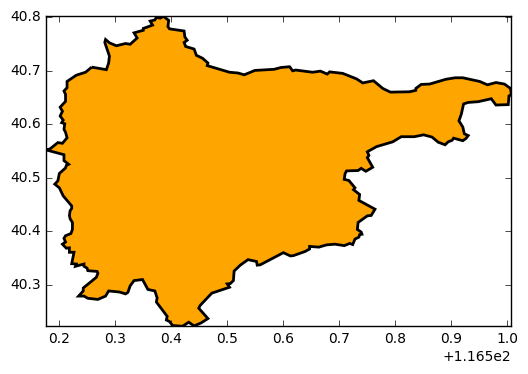

In [17]:


# verts = [
#     (0., 0.), # left, bottom
#     (0., 1.), # left, top
#     (1., 1.), # right, top
#     (1., 0.), # right, bottom
#     (0., 0.), # ignored
#     ]

# codes = [Path.MOVETO,
#          Path.LINETO,
#          Path.LINETO,
#          Path.LINETO,
#          Path.CLOSEPOLY,
#          ]

path = Path(data_array)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(min(data_array[:,0]),max(data_array[:,0]))
ax.set_ylim(min(data_array[:,1]),max(data_array[:,1]))
plt.show()